In [17]:
# 0328 Kaggle HousePrice predict -
- 0328 : 데이터 분석 및 전처리 : 적절한 사유를 갖추어 이 분석에서는 필요없다고
            생각되는 columns들을 삭제해야 한다.
- mae / mse/ rmse

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (2570846433.py, line 2)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import sklearn

print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(mpl.__version__)
print(sklearn.__version__)

In [ ]:
!pip install seaborn

In [90]:
!pip install sklearn

In [18]:
DATA_PATH = 'house-prices-advanced-regression-techniques/'
train = pd.read_csv(DATA_PATH + 'train.csv')
test = pd.read_csv(DATA_PATH + 'test.csv')
train.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [19]:
test.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


In [20]:
!pip install scikit-learn

- 데이터 정보를 확인.info()

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

- 결측치가 존재하는 것은, 나중에 처리를 해야 한다.
--> 머신러닝, 딥러닝 하시는 분들에게 가장 난이도가 높은 작업

## Feature Engineering
- Feature Engineering 책이 별도 존재
- 수치형 데이터 접근
- 문자형(범주형) 데이터 접근
- 전체 데이터셋이 너무 크면, 축소하는 방법
-(!** 고난이도 중요점) 파생 변수 생성
-오렌지, 레몬 --> 합계 : 대표성이 있는 것. 
        : + 으로 만들었는데, 일반적으로 파생변수를 만들 때,
            수학적인 함수를 활용해서 만든다.
        ex) 실무에서는 함수화가 안 되어 있을 경우가 많아서 
            실무자들이 수학논문들을 찾아서 직접 파생변수를 만들어야 한다.
            그리고 테스트 한 후 성과가 좋으면, 실무네 적용한다.            

# OverlallQual <4, SalePrice > 100000 
- -> 주택 상태는 안 좋은데, 주택가격이 매우 높다.
- 일반지역
- 실무에서는 내가 직접 발로 확인해야 한다! 데이터가 왜 이렇게 나왔는지 확인 필요
- 결측치/이상치를 현업과 직접 확인해서 삭제하거나 수정해야 한다.
- 이 프로젝은 지도학습

train =train.drop(train[(train['OverallQual']<4)&(train['SalesPrice'])].index)

In [27]:
train.shape

(1455, 81)

In [28]:
train = train.drop(train[(train['OverallQual'] < 4) & (train['SalePrice'] > 100000)].index)
train.shape

(1455, 81)

In [29]:
train = train.reset_index(drop=True)
train.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


- 지도학습을 할 때는 종속변수의 분포를 확인해야 한다.

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [30]:
from scipy.stats import norm
import matplotlib.pyplot as plt

# 로그변환 
train['SalePrice'] = np.loglp(train['SalePrice'])

# 평균 표준편차
(mu, sigma) = norm.fit(train['SalePrice'])
print(mu, sigma)

fix, ax = plt.subplots(figsize=(10,6))
sns.histplot(train['SalePrice'], color = 'b', stat='probability')
ax.set_title('SalePrice Distribution')
ax.set_xlabel('SalePrice')
ax.set_ylabel('Frequency')

ax.axvline(mu, color='r', linestyle='--')
#ax.text(mu+ 10000, 0.11, 'Mean of SalePrice')

# 로그변환 위해 수치 수정
ax.text(mu+ 0.05, 0.111, 'Mean of SalePrice')

plt.show()             

AttributeError: module 'numpy' has no attribute 'loglp'

- 빈도주의 : 여러 통계 이론 존재
    +---> 전제조건 : 표준정규분포
    +---> 통계 이론이 정상적으로 작동을 하려면, 분포가 정규분포여야만 작동을 한다.
    +----> 이론 자체가 정상 분포 위에 구축되었기 때문이다.
    +----> 강제로 정규화 해야 한다.
    +----> 로그변환 한다.

12.025216848544066 0.3994595223123619


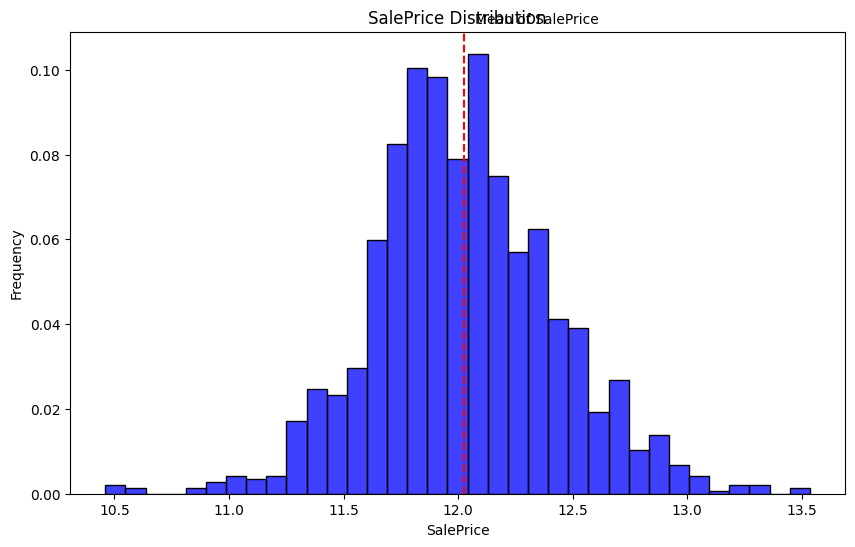

In [31]:
from scipy.stats import norm
import matplotlib.pyplot as plt

# 평균, 표준편차
# 선형모델 : 선형회귀, SVM 은 무조건 로그변환 해야한다.
# 트리모델 : 이런 변환은 굳이 할 필요가 없다.
# 선형 모델이 좋을 지, 트리모델이 좋을 지, 우리는 모르기 때문에 모두 변환한다.
# 로그 변환 명령

train['SalePrice'] = np.log1p(train['SalePrice'])

(mu, sigma) = norm.fit(train['SalePrice'])
print(mu, sigma)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(train['SalePrice'], color='b', stat='probability')
ax.set_title('SalePrice Distribution')
ax.set_xlabel('SalePrice')
ax.set_ylabel('Frequency')

ax.axvline(mu, color = 'r', linestyle='--')
#로그변환값
ax.text(mu + 0.05, 0.111, 'Mean of SalePrice')

plt.show()

## 컬럼 일부 제거

- id는 꼭 지워야 한다.패턴이 없기 때문에 필요 없는 데이터는 지운다.

In [32]:
train['Id'] 

0          1
1          2
2          3
3          4
4          5
        ... 
1450    1456
1451    1457
1452    1458
1453    1459
1454    1460
Name: Id, Length: 1455, dtype: int64

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1455 non-null   int64  
 1   MSSubClass     1455 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1197 non-null   float64
 4   LotArea        1455 non-null   int64  
 5   Street         1455 non-null   object 
 6   Alley          90 non-null     object 
 7   LotShape       1455 non-null   object 
 8   LandContour    1455 non-null   object 
 9   Utilities      1455 non-null   object 
 10  LotConfig      1455 non-null   object 
 11  LandSlope      1455 non-null   object 
 12  Neighborhood   1455 non-null   object 
 13  Condition1     1455 non-null   object 
 14  Condition2     1455 non-null   object 
 15  BldgType       1455 non-null   object 
 16  HouseStyle     1455 non-null   object 
 17  OverallQual    1455 non-null   int64  
 18  OverallC

In [34]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171


- 머신러닝, 딥러닝 할 때, 패턴을 습득해야 한다.
- 비 정형 데이터는 인공신경망으로 돌린다.
- 알고리즘 의미가 없다.
- 어떤 데이터를 지울 것인가? 모든 리스트의 항목들이 집 값에 영향을 미치는지 조사해서 
하나씩 지워가야 한다.
    + 17  OverallQual    1455 non-null   int64  : 집의 외장재를 의미
    + 18  OverallCond 

In [35]:
train_ID = train['Id']
test_ID = test['Id']
train = train.drop(['Id'], axis =1)
test = test.drop(['Id'], axis =1)

train.shape, test.shape

((1455, 80), (1459, 79))

In [ ]:
-값만 추출

In [36]:
y = train['SalePrice'].reset_index(drop=True)
train = train.drop(['SalePrice'], axis =1)

train.shape, test.shape, y.shape

((1455, 79), (1459, 79), (1455,))

## 데이터 전처리
-한 번에 진행할 예정
-실무에서는 이렇게 하면 안 된다. (이유 : Data Leakage 피하기 위해서)
- 평균치로 측정하는 것이 나쁜 것이 아니다. -> 평균치를 선택한 사유만 명확하게 설명하면 된다

In [37]:
# 데이터 합치기 ; train+test data
all_df = pd.concat([train,test]).reset_index(drop=True)
all_df.shape

(2914, 79)

## 결측치 확인 코드 -- 하기 코드 항상 사용하면 된다. 
- 결측치의 비율을 확인하는 함수를 만든다.
- Missing Ratio : 
- PoolQC : 결측치를 의미한다. : 현재 데이터셋은 모든 데이터가 결측치이다.99.656829
    + 패턴이 발견될 가능성이 적은 데이터들이다.
    + 결측치가 높은 데이터를 채우거나, 버리거나 선택해야 한다.
    + 수식에 빈 값이 들어가면 정상적으로 작동하지 않기 때문에 채워야 한다.
    + object / float 방식 중 선택하는데 기준이 다르기 때문에 기준을 맞춰야 한다.
    + PoolQC~LotFrontage 까지 삭제한다. : 강의에서는
        + 실제로는 위의 결측치가 높은 데이터들에 대해서 공부해서 이 분석에 영향을 주는지
            하나씩 조사해야 한다!

In [38]:
def check_na(data, head_num = 6):
  isnull_na = (data.isnull().sum() / len(data)) * 100
  data_na = isnull_na.drop(isnull_na[isnull_na == 0].index).sort_values(ascending=False)
  missing_data = pd.DataFrame({'Missing Ratio' :data_na, 
                               'Data Type': data.dtypes[data_na.index]})
  print("결측치 데이터 컬럼과 건수:\n", missing_data.head(head_num))

check_na(all_df, 20)

결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
PoolQC            99.656829    object
MiscFeature       96.396706    object
Alley             93.239533    object
Fence             80.439259    object
FireplaceQu       48.592999    object
LotFrontage       16.643789   float64
GarageFinish       5.456417    object
GarageQual         5.456417    object
GarageCond         5.456417    object
GarageYrBlt        5.456417   float64
GarageType         5.387783    object
BsmtExposure       2.779684    object
BsmtCond           2.779684    object
BsmtQual           2.745367    object
BsmtFinType2       2.711050    object
BsmtFinType1       2.676733    object
MasVnrType         0.823610    object
MasVnrArea         0.789293   float64
MSZoning           0.137268    object
BsmtFullBath       0.068634   float64


In [39]:
rm_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']
all_df = all_df.drop(rm_cols, axis=1)
check_na(all_df)

결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
GarageCond         5.456417    object
GarageQual         5.456417    object
GarageYrBlt        5.456417   float64
GarageFinish       5.456417    object
GarageType         5.387783    object
BsmtCond           2.779684    object


## 위에 남은 데이터들은 일부만 결측치가 있는 데이터들이다.
    + 데이터를 채워야 하는데 조사를 해서 결측치를 채워준다
    + 어떻게 채우는가?
        + object : 가장 높은 빈도로 채우기
        + float: 평균, 중간값, 다른 값을 넣든가, 해야 한다.
        + 원칙이 없고 그때마다 다르게 조사해서 넣어야 한다.
        + 실험을 해서 데이터를 어떻게 채워야 하는지 확인해야 한다.
        + 중간값 넣고/평균값 넣고/... 등등을 직접 실험해서 고려해야 한다.
        + 

In [40]:
check_na((all_df),20)

결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
GarageCond         5.456417    object
GarageQual         5.456417    object
GarageYrBlt        5.456417   float64
GarageFinish       5.456417    object
GarageType         5.387783    object
BsmtCond           2.779684    object
BsmtExposure       2.779684    object
BsmtQual           2.745367    object
BsmtFinType2       2.711050    object
BsmtFinType1       2.676733    object
MasVnrType         0.823610    object
MasVnrArea         0.789293   float64
MSZoning           0.137268    object
Functional         0.068634    object
Utilities          0.068634    object
BsmtFullBath       0.068634   float64
BsmtHalfBath       0.068634   float64
GarageArea         0.034317   float64
GarageCars         0.034317   float64
TotalBsmtSF        0.034317   float64


## 결측치 채우기
- 문자열 데이터는 가장 빈도가 높은 데이터로 대치하는 방법 적용(임시방편)
    + 이상치 처리 어떻게 해요? 결측치 처리 어떻게 해요? 변수 어떻게 정했어요?
    + 결측치 처리하는 방법이 관건이다.
    + 평균값을 사용하더라도 어떻게 사용했는지 구체적으로 조사해서 적용하는 것이 중요하다.

In [41]:
all_df['BsmtCond'].value_counts() # 자동으로 오름차순

TA    2602
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [42]:
# ['이 안에 데이터 컬럼을 넣는다.']
all_df['BsmtCond'].mode()[0]

'TA'

In [43]:
all_df['GarageFinish'].mode()[0]

'Unf'

## # 결측치 채우는 함수
fillna() 

## 아래 코드 외우기 : 문자형컬럼만 추출함 / 수치형은 
## cat_all_vars = train.select_dtypes(exclude=[np.number])

In [44]:
import numpy as np

cat_all_vars = all_df.select_dtypes(exclude=[np.number])
# print(cat_all_vars.info())

cat_vars = cat_all_vars.columns
print(cat_vars)
print(len(cat_vars))

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
38


## 결측치 채우기

In [45]:
for i in cat_vars:
    all_df[i] = all_df[i].fillna(all_df[i].mode()[0])
    
check_na(all_df,20)

결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
GarageYrBlt        5.456417   float64
MasVnrArea         0.789293   float64
BsmtFullBath       0.068634   float64
BsmtHalfBath       0.068634   float64
BsmtFinSF1         0.034317   float64
BsmtFinSF2         0.034317   float64
BsmtUnfSF          0.034317   float64
TotalBsmtSF        0.034317   float64
GarageCars         0.034317   float64
GarageArea         0.034317   float64


## 수치 데이터 결측치 채우기
## 중간값으로 채우기 : median()

In [46]:
import numpy as np

# 이름 변경 number : 문자열 제외 -> 숫자를 포함(include)
num_all_vars = all_df.select_dtypes(include=[np.number]) # 수정함 include
print(num_all_vars.head())
print(num_all_vars.info())

num_cols = num_all_vars.columns
print(num_cols)
for i in num_cols:
    # 그대로 사용한다.
    all_df[i] = all_df[i].fillna(all_df[i].median())
    
check_na(all_df,20)

   MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5       2003          2003   
1          20     9600            6            8       1976          1976   
2          60    11250            7            5       2001          2002   
3          70     9550            7            5       1915          1970   
4          60    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  GarageArea  WoodDeckSF  \
0       196.0       706.0         0.0      150.0  ...       548.0           0   
1         0.0       978.0         0.0      284.0  ...       460.0         298   
2       162.0       486.0         0.0      434.0  ...       608.0           0   
3         0.0       216.0         0.0      540.0  ...       642.0           0   
4       350.0       655.0         0.0      490.0  ...       836.0         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPo

In [47]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2914 non-null   int64  
 1   MSZoning       2914 non-null   object 
 2   LotArea        2914 non-null   int64  
 3   Street         2914 non-null   object 
 4   LotShape       2914 non-null   object 
 5   LandContour    2914 non-null   object 
 6   Utilities      2914 non-null   object 
 7   LotConfig      2914 non-null   object 
 8   LandSlope      2914 non-null   object 
 9   Neighborhood   2914 non-null   object 
 10  Condition1     2914 non-null   object 
 11  Condition2     2914 non-null   object 
 12  BldgType       2914 non-null   object 
 13  HouseStyle     2914 non-null   object 
 14  OverallQual    2914 non-null   int64  
 15  OverallCond    2914 non-null   int64  
 16  YearBuilt      2914 non-null   int64  
 17  YearRemodAdd   2914 non-null   int64  
 18  RoofStyl

## 왜도 처리하기

- skewness
- 왜도 보정
    + 이 분포틑 왜도야! 진단을 내려야 한다.
    + -3 ~ +3

In [48]:
num_cols

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [49]:
from scipy.stats import skew

def find_skew(x):
    return skew(x)

In [50]:
# all_df[num_cols] : num_cols에 각기 위에 정의한 값들을 그때마다 넣는다.
skewness_features = all_df[num_cols].apply(find_skew).sort_values(ascending=False)
skewness_features

MiscVal          21.928383
PoolArea         16.883698
LotArea          12.817577
LowQualFinSF     12.078203
3SsnPorch        11.366100
KitchenAbvGr      4.316357
BsmtFinSF2        4.142042
EnclosedPorch     4.019921
ScreenPorch       3.942711
BsmtHalfBath      3.927598
MasVnrArea        2.610910
OpenPorchSF       2.538734
WoodDeckSF        1.842626
1stFlrSF          1.471175
BsmtFinSF1        1.423690
MSSubClass        1.373564
GrLivArea         1.268174
TotalBsmtSF       1.166820
BsmtUnfSF         0.920694
2ndFlrSF          0.862272
TotRmsAbvGrd      0.759082
Fireplaces        0.732140
HalfBath          0.693438
BsmtFullBath      0.623599
OverallCond       0.571076
BedroomAbvGr      0.326914
GarageArea        0.238810
OverallQual       0.206317
MoSold            0.196270
FullBath          0.167065
YrSold            0.131984
GarageCars       -0.220598
GarageYrBlt      -0.397630
YearRemodAdd     -0.452230
YearBuilt        -0.602844
dtype: float64

In [51]:
# 위의 데이터는 dataframe, series 중에서 series index임
skewness_index = list(skewness_features.index)
skewness_index

['MiscVal',
 'PoolArea',
 'LotArea',
 'LowQualFinSF',
 '3SsnPorch',
 'KitchenAbvGr',
 'BsmtFinSF2',
 'EnclosedPorch',
 'ScreenPorch',
 'BsmtHalfBath',
 'MasVnrArea',
 'OpenPorchSF',
 'WoodDeckSF',
 '1stFlrSF',
 'BsmtFinSF1',
 'MSSubClass',
 'GrLivArea',
 'TotalBsmtSF',
 'BsmtUnfSF',
 '2ndFlrSF',
 'TotRmsAbvGrd',
 'Fireplaces',
 'HalfBath',
 'BsmtFullBath',
 'OverallCond',
 'BedroomAbvGr',
 'GarageArea',
 'OverallQual',
 'MoSold',
 'FullBath',
 'YrSold',
 'GarageCars',
 'GarageYrBlt',
 'YearRemodAdd',
 'YearBuilt']

In [52]:
# 변수들을 하나씩 뽑는 것이 정석
all_df['LotArea'].nunique()

1949

In [53]:
all_df['LotArea'].nunique() # 데이터의 갯수, id같은 개념이다. index에서 빼도 된다.

1949

- 실제로 수치 데이터는 아니나, 명목상 수치형으로 바꿔서 들어간 데이터들도 많다.
    + 실무에서는 수치데이터들에서 제거해야 하는 데이터이다.

In [54]:
skewness_index.remove('LotArea')
skewness_index

['MiscVal',
 'PoolArea',
 'LowQualFinSF',
 '3SsnPorch',
 'KitchenAbvGr',
 'BsmtFinSF2',
 'EnclosedPorch',
 'ScreenPorch',
 'BsmtHalfBath',
 'MasVnrArea',
 'OpenPorchSF',
 'WoodDeckSF',
 '1stFlrSF',
 'BsmtFinSF1',
 'MSSubClass',
 'GrLivArea',
 'TotalBsmtSF',
 'BsmtUnfSF',
 '2ndFlrSF',
 'TotRmsAbvGrd',
 'Fireplaces',
 'HalfBath',
 'BsmtFullBath',
 'OverallCond',
 'BedroomAbvGr',
 'GarageArea',
 'OverallQual',
 'MoSold',
 'FullBath',
 'YrSold',
 'GarageCars',
 'GarageYrBlt',
 'YearRemodAdd',
 'YearBuilt']

In [55]:
all_numeric_df = all_df.loc[:,skewness_index]
all_numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MiscVal        2914 non-null   int64  
 1   PoolArea       2914 non-null   int64  
 2   LowQualFinSF   2914 non-null   int64  
 3   3SsnPorch      2914 non-null   int64  
 4   KitchenAbvGr   2914 non-null   int64  
 5   BsmtFinSF2     2914 non-null   float64
 6   EnclosedPorch  2914 non-null   int64  
 7   ScreenPorch    2914 non-null   int64  
 8   BsmtHalfBath   2914 non-null   float64
 9   MasVnrArea     2914 non-null   float64
 10  OpenPorchSF    2914 non-null   int64  
 11  WoodDeckSF     2914 non-null   int64  
 12  1stFlrSF       2914 non-null   int64  
 13  BsmtFinSF1     2914 non-null   float64
 14  MSSubClass     2914 non-null   int64  
 15  GrLivArea      2914 non-null   int64  
 16  TotalBsmtSF    2914 non-null   float64
 17  BsmtUnfSF      2914 non-null   float64
 18  2ndFlrSF

- boxplot graph
    + 우측의 떨어져 나온 마름모들이 이상치이다.

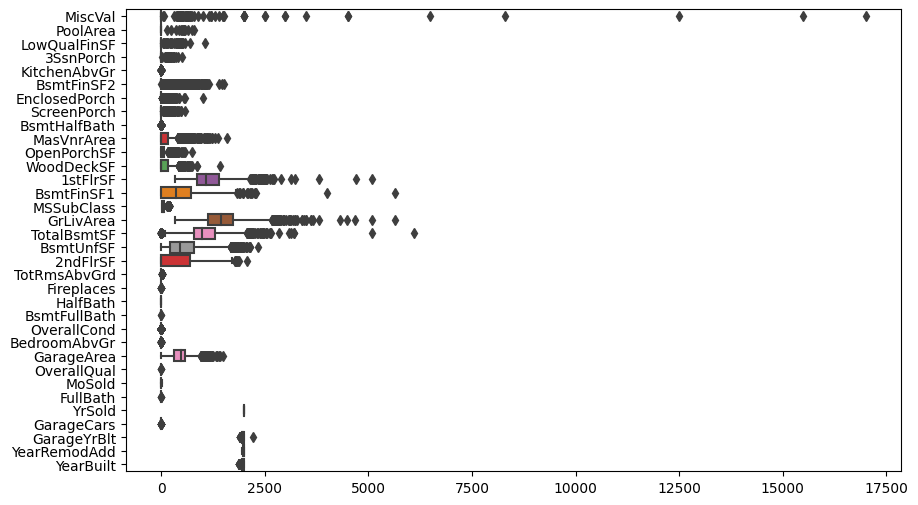

In [56]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data = all_numeric_df, orient = 'h', palette = 'Set1')
plt.show()

## 왜도가 1보다 높은 수치형 변수를 출력하는 코드
- 왜도가 높은 컬럼만 조회한다.
- 변환하면 된다. 정규분포를 이륒 않는 데이터를 정규분포를 이루도록 도와주는 장치
    +boxcox변환, 로그변환

In [57]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# 왜도가 1보다 높은 수치형 변수 출력
high_skew = skewness_features[skewness_features > 1]
high_skew_index = high_skew.index
print(high_skew_index)
print(len(high_skew_index))

Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch',
       'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', '1stFlrSF',
       'BsmtFinSF1', 'MSSubClass', 'GrLivArea', 'TotalBsmtSF'],
      dtype='object')
18


In [58]:
# boxcox를 변환하는 코드
for num_var in high_skew_index:
    all_df[num_var] = boxcox1p(all_df[num_var], boxcox_normmax(all_df[num_var]+1))

C:\Users\User\Desktop\Kaggle\venv\Lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\User\Desktop\Kaggle\venv\Lib\site-packages\scipy\stats\_stats_py.py:4461: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(stats.NearConstantInputWarning(msg))


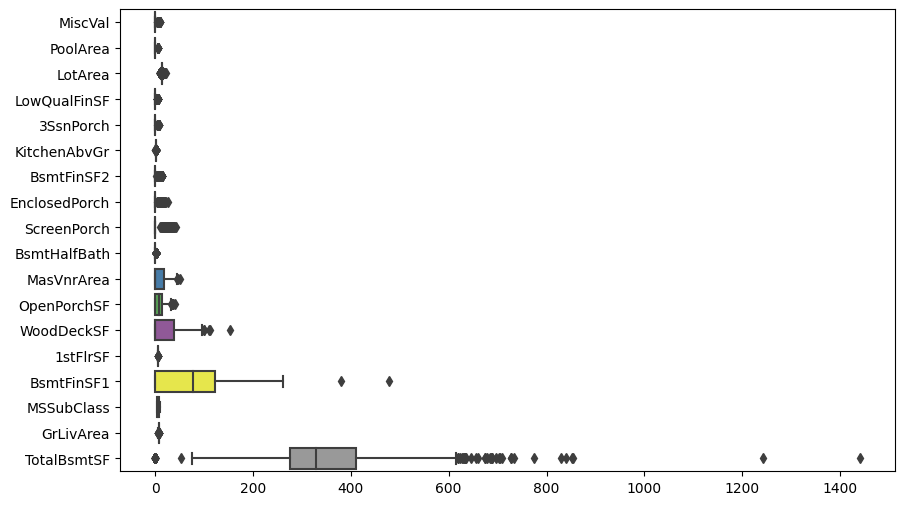

In [59]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=all_df[high_skew_index], orient= 'h',palette ='Set1')
plt.show()

## 도출변수(파생변수)
- 각 층의 면적을 모두 더해 전체 면적으로 계산한 새로운 변수를 작성한다.
- 모델을 창조하기 위한 최종의 데이터를 만들기 위해서 쓸데없는 데이터를 삭제하고 줄이는 작업을 계속하는 것이다. 

In [60]:
# TotalBsmtSF, 1stFlrSF, 2ndFlrSF : - 1+2층 면적 합쳐 총 면적 합치기
all_df['TotalSF'] = all_df['TotalBsmtSF'] + all_df['1stFlrSF'] + all_df['2ndFlrSF']
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2914 non-null   float64
 1   MSZoning       2914 non-null   object 
 2   LotArea        2914 non-null   float64
 3   Street         2914 non-null   object 
 4   LotShape       2914 non-null   object 
 5   LandContour    2914 non-null   object 
 6   Utilities      2914 non-null   object 
 7   LotConfig      2914 non-null   object 
 8   LandSlope      2914 non-null   object 
 9   Neighborhood   2914 non-null   object 
 10  Condition1     2914 non-null   object 
 11  Condition2     2914 non-null   object 
 12  BldgType       2914 non-null   object 
 13  HouseStyle     2914 non-null   object 
 14  OverallQual    2914 non-null   int64  
 15  OverallCond    2914 non-null   int64  
 16  YearBuilt      2914 non-null   int64  
 17  YearRemodAdd   2914 non-null   int64  
 18  RoofStyl

In [61]:
all_df.shape

(2914, 74)

In [62]:
all_df = all_df.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis = 1)
all_df.shape

(2914, 71)

In [63]:
all_df['Total_Bathrooms'] = (all_df['FullBath'] + (0.5 * all_df['HalfBath']) + all_df['BsmtFullBath'] + (0.5 * all_df['BsmtHalfBath']))
all_df['Total_porch_sf'] = (all_df['OpenPorchSF'] + all_df['3SsnPorch'] + all_df['EnclosedPorch'] + all_df['ScreenPorch'])
all_df = all_df.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch'], axis=1)
print(all_df.shape)

(2914, 65)


- 연도를 통합 :  yrs

In [64]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 65 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       2914 non-null   float64
 1   MSZoning         2914 non-null   object 
 2   LotArea          2914 non-null   float64
 3   Street           2914 non-null   object 
 4   LotShape         2914 non-null   object 
 5   LandContour      2914 non-null   object 
 6   Utilities        2914 non-null   object 
 7   LotConfig        2914 non-null   object 
 8   LandSlope        2914 non-null   object 
 9   Neighborhood     2914 non-null   object 
 10  Condition1       2914 non-null   object 
 11  Condition2       2914 non-null   object 
 12  BldgType         2914 non-null   object 
 13  HouseStyle       2914 non-null   object 
 14  OverallQual      2914 non-null   int64  
 15  OverallCond      2914 non-null   int64  
 16  YearBuilt        2914 non-null   int64  
 17  YearRemodAdd  

In [65]:
len(num_cols)


35

In [66]:
num_cols

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [67]:
num_cols
years_features = []
for col in num_cols:
    if 'Yr' in col:
        years_features.append(col)
    elif 'Year' in col:
        years_features.append(col)
    else:
        print(col, "is not year....")
years_features

MSSubClass is not year....
LotArea is not year....
OverallQual is not year....
OverallCond is not year....
MasVnrArea is not year....
BsmtFinSF1 is not year....
BsmtFinSF2 is not year....
BsmtUnfSF is not year....
TotalBsmtSF is not year....
1stFlrSF is not year....
2ndFlrSF is not year....
LowQualFinSF is not year....
GrLivArea is not year....
BsmtFullBath is not year....
BsmtHalfBath is not year....
FullBath is not year....
HalfBath is not year....
BedroomAbvGr is not year....
KitchenAbvGr is not year....
TotRmsAbvGrd is not year....
Fireplaces is not year....
GarageCars is not year....
GarageArea is not year....
WoodDeckSF is not year....
OpenPorchSF is not year....
EnclosedPorch is not year....
3SsnPorch is not year....
ScreenPorch is not year....
PoolArea is not year....
MiscVal is not year....
MoSold is not year....


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [68]:
all_df[years_features]


,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
...,...,...,...,...
2909,1970,1970,1979.0,2006
2910,1970,1970,1970.0,2006
2911,1960,1996,1960.0,2006
2912,1992,1992,1979.0,2006


- SalePrice와 어떤 연관성이 있는지 확인하는 코드를 작성하자

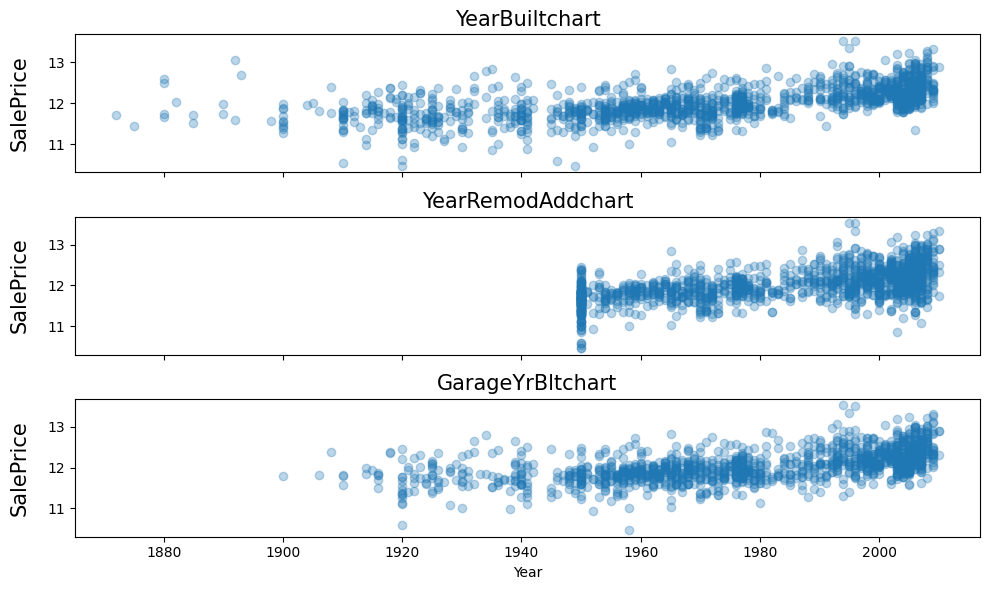

In [69]:
fig, ax = plt. subplots(3,1, figsize =(10,6), sharex=True, sharey=True) # sharex 쉐어하는 것
for i, var in enumerate(years_features):
    if var !='YrSold':
            ax[i].scatter(train[var], y ,alpha=0.3)
            ax[i].set_title(f'{var}chart', size=15)
            ax[i].set_ylabel('SalePrice', size=15, labelpad =12.5)
            
plt.xlabel('Year')
plt.tight_layout()
plt.show()

- 또 필요없는 cols를 삭제한다.

In [70]:
all_df = all_df.drop(['YearBuilt', 'GarageYrBlt'], axis =1)
print(all_df.shape)

(2914, 63)


- 산점도 작성
    +파생변수 하나 = YrSold - YearRemodAdd

In [71]:
all_df = all_df.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis = 1)
print(all_df.shape)

KeyError: "['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'] not found in axis"

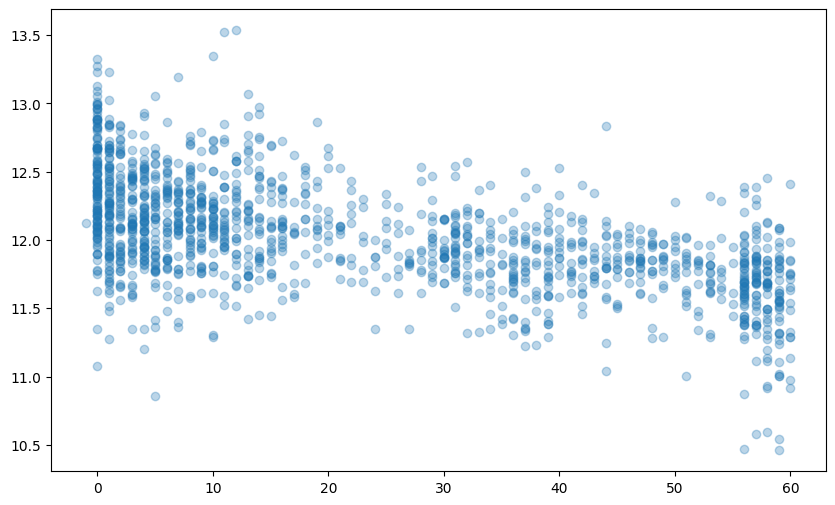

In [72]:
yearSinceRemodel = train['YrSold'].astype(int) - train['YearRemodAdd'].astype(int)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(yearSinceRemodel, y, alpha = 0.3)
plt.show()

In [73]:
all_df['YearsSinceRemodel'] = all_df['YrSold'].astype(int) - all_df['YearRemodAdd'].astype(int)
all_df = all_df.drop(['YrSold', 'YearRemodAdd'], axis=1)
print(all_df.shape)

(2914, 62)


## 더미 변수
- 더미 변수란, 독립 변수를 0과 1로 변환하는 변수를 말합니다.
- 아래 데이터 확인

In [74]:
all_df['PoolArea'].value_counts()

0.000000    2901
5.844393       1
6.049845       1
5.947237       1
5.914833       1
5.787942       1
5.856262       1
6.162866       1
4.722721       1
5.554803       1
5.719656       1
5.131878       1
5.924217       1
6.232823       1
Name: PoolArea, dtype: int64

- 수영장이 있는 집은 빼겠다.
- 수영장이 있는 집은 비싸기 때문에 들어가야 해서, 넣어야 한다.
- 여러가지 고려해야 한다... 이 점이 어려움
- 0과 1로 나눠서 비교해서 잘 맞는 결과를 실험해서 나은 결과값을 사용하겠다! 가 데이터 분석이다.
- 변수에서 삭제하려면 삭제하는 근거를 분석 보고서에 넣을 수 있어야 한다.

In [75]:
def count_dummy(x):
    if x > 0:
        return 1
    else:
        return 0

In [76]:
all_df['PoolArea'] = all_df['PoolArea'].apply(count_dummy)
all_df['PoolArea'].value_counts()

0    2901
1      13
Name: PoolArea, dtype: int64

- count_dummy로 데이터를 줄여간다.

In [77]:
all_df['GarageArea'] = all_df['GarageArea'].apply(count_dummy)
all_df['GarageArea'].value_counts()

1    2757
0     157
Name: GarageArea, dtype: int64

- count_dummy로 데이터를 또 줄여간다.

In [78]:
all_df['Fireplaces'] = all_df['Fireplaces'].apply(count_dummy)
all_df['Fireplaces'].value_counts()

1    1498
0    1416
Name: Fireplaces, dtype: int64

- count_dummy로 데이터를 줄였다. 결과를 보자

In [79]:
all_df.shape

(2914, 62)

## One hot Encoding 
- 예를 들어 시, 도를 값을 구한다면, 
    1904개의 데이터마다 0과 1로 각각 값을 대입해주면 
    테이블의 값이 점점 늘어나는데, 지금까지 쓸모없는 데이터들을 줄여줘 왔는데
    이렇게 하는 것은 의미가 없어진다.

## 원핫 인코딩

In [81]:
import pandas as pd

temp = pd.DataFrame({'Food'})

In [82]:
temp = pd.get_dummies(temp)
print(temp)
print(temp.shape)

   0_Food
0       1
(1, 1)


In [83]:
all_df = pd.get_dummies(all_df).reset_index(drop=True)
all_df.shape

(2914, 258)

In [84]:
all_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,6.514849,13.441162,7,5,19.403768,118.155294,0.0,150.0,0.0,7.250638,...,0,0,0,1,0,0,0,0,1,0
1,4.256808,13.711769,6,8,0.000000,147.201453,0.0,284.0,0.0,6.962437,...,0,0,0,1,0,0,0,0,1,0
2,6.514849,14.052142,7,5,17.743120,91.791879,0.0,434.0,0.0,7.291844,...,0,0,0,1,0,0,0,0,1,0
3,6.879231,13.700638,7,5,0.000000,52.881454,0.0,540.0,0.0,7.254509,...,0,0,0,1,1,0,0,0,0,0
4,6.514849,14.569342,8,5,25.360528,112.321018,0.0,490.0,0.0,7.488374,...,0,0,0,1,0,0,0,0,1,0


## 범주형 변수를 재 그룹화 한다.
- 그룹화하지 않으면 컬럼의 갯수가 늘어나고 성능이 낮아지므로 비효율성이 커진다.
- 기존 변수들을 그룹으로 새롭게 묶어야 one hot encoding 할 때, 컬럼이 줄어든다.
- 이 그룹화가 어렵다.
- 강동구/강남구/중구,,,,: 서울특별시
- 부평구/남동구/부천시.... : 인천광역시
- 광명시... : 경기도

## 머신러닝 모형 학습 및 평가
- 전처리가 끝났다고 가정하고,

In [85]:
# train, test 가 합쳐진 데이터
# train, X = 독립변수, 
X = all_df.iloc[:len(y), :]
test = all_df.iloc[len(y):, :]
X.shape, y.shape, test.shape

((1455, 258), (1455,), (1459, 258))

- 훈련(train)데이터과 검증(validation) 데이터로 분리한다.
- validation data : 가상의 시뮬레이션을 통해서 데이터를 분류한다.
                    계속 훈련해서 적절하게 값이 나왔다고 판단하면 test에 들어간다.
- test data : 실전, 실험이다.


## 테스트 데이터를 여기서는 사용하지 않는다.
## 검증이 완료가 되어야만 사용이 가능하다.

In [86]:
# 테스트데이터를 여기서는 사용하지 않는다! 
# 검증이 완료가 되어야만 사용이 가능합니다. 
from sklearn.model_selection import train_test_split 
X_train, X_val, y_train, y_val = train_test_split(
          # 검증데이터 사이즈
    X, y, test_size = 0.25, random_state = 42
)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1091, 258), (364, 258), (1091,), (364,))

## 평가지표
-오차가 적은 모형이 제일 좋다.
- MSE : 음수 출력시, 제곱으로 보정 : 왜곡 심함
- MAE : 음수 출력시, 절대값으로 변경
- RMSE : MSE에 루트 적용, 큰 오류값 보정 
- 참조 : https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [88]:
from sklearn.metrics import mean_squared_error

def rmse(y_ture, y_pred):
    return np.sqrt(mean_squared_error(y_ture, y_pred))

In [ ]:
## 모형 정의 및 검증 평가
- 모의 고사 없이 바로 테스트를 할 수 없음
- 간단한 비유를 들자면
    + 훈련데이터 : 문제은행의 다양한 문제 유형
    + 검증(validation)데이터 : 실전 모의고사
    + 시험(test)데이터 : 수능문제
-모의 고사를 여러 번 보자
    + Kfold method : sklearn
    + 교차검증 : "집합을 체계적으로 바꿔가면서
                 모든 데이터에 대해 모형의 성과를 측정하는 검증 방식"
        + 교차검증 횟수가 높으면 결과의 신뢰도가 높다.
    + 교차 검증 횟수 :5 / 10 일반적 횟수
    + from sklearn.model_selection import cross_val_score

In [91]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import kfold, cross_val_socre
from sklearn.linear_model import LinearRegession

def cv_rmse(model, n_folds=5):
    # 5번의 교차 검증을 수행하겠음
    cv = Kfole(n_splots = n_folds, random_state=42, shuffle=True)
    # 각각의 평가지표를 산출해달라. np.sqrt = 루트
    rmse_list = np.sqrt(-cross_val_score(model, X, y, Scoring = neg_mean_squared_error, cv=cv))
    print('CV RMSE Value List:', np.round(rmse_list, 4))
    print('CV RMSE mean value:', np.round(np.mean(rmse_list), 4))
    return(rmse_list)

n_foled = 5
rmse_scores ={}
lr_model = LinearRegession()

ImportError: cannot import name 'kfold' from 'sklearn.model_selection' (C:\Users\User\Desktop\Kaggle\venv\Lib\site-packages\sklearn\model_selection\__init__.py)

## 230329 : 모델
- 교차검증

In [92]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression 

def cv_rmse(model, n_folds=5):
    # 5번의 교차검증을 수행하겠음 
    cv = KFold(n_splits = n_folds, random_state=42, shuffle=True)
    # 각각의 평가지표를 산출해달라. np.sqrt = 루트
    rmse_list = np.sqrt(-cross_val_score(model, X, y, scoring = 'neg_mean_squared_error', cv=cv))
    print('CV RMSE Value List:', np.round(rmse_list, 4))
    print('CV RMSE mean value:', np.round(np.mean(rmse_list), 4))
    return (rmse_list)

n_folds = 5
rmse_scores = {}
lr_model = LinearRegression()

-각 검증 데이터 평가한 평가지표의 평균값 구하기
-선형 회귀의 지표 확인

In [94]:
score = cv_rmse(lr_model, n_folds)
print("선형회귀 - mean: {:,.4f} (std:{:.4f}".format(score.mean(), score.std()))

CV RMSE Value List: [0.1157 0.1109 0.1334 0.1453 0.1829]
CV RMSE mean value: 0.1376
선형회귀 - mean: 0.1376 (std:0.0258


## 첫번째 최종 예측값 제출
- np.expm1() 함수를 활용해서 로그값으로 변환한 걸, 다시 원래 밧으로 변환

In [97]:
from sklearn.model_selection import cross_val_score
X = all_df.iloc[:len(y), :]
X_test = all_df.iloc[len(y):, :]
X.shape, y.shape, X_test.shape

((1455, 258), (1455,), (1459, 258))

In [99]:
lr_model_fit = lr_model.fit(X,y)
lr_model_fit

LinearRegression()

In [101]:
final_preds = np.floor(np.expm1(lr_model_fit.predict(X_test)))
final_preds[:5]

array([117040., 158151., 187395., 197364., 200040.])

- 제출코드 작성

In [103]:
submission = pd.read_csv(DATA_PATH + "sample_submission.csv")
submission.iloc[:,1] = final_preds
print(submission.head())
submission.to_csv(DATA_PATH + "The_first_regression.csv", index=False)

     Id  SalePrice
0  1461   117040.0
1  1462   158151.0
2  1463   187395.0
3  1464   197364.0
4  1465   200040.0


- 모형
- 베이스라인 코드 : 파생변수들은 작업하지않고 
    모형이 돌아가게 까지 한 코드
-  ---------------- 여기가 기준점 ---------------
- 베이스라인 코드보다 성능이 좋으면 된다.

## 모형 알고리즘 추가
- 각각의 모형을 불러온 후, 기존에 정의된 cv_rmse 함수에 적용

In [107]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
gbr_model = GradientBoostingRegressor()

In [108]:
score = cv_rmse(lr_model, n_folds)
print("linear regression - mean: {:.4f} (std: {:.4f})".format(score.mean(), score.std()))
rmse_scores['linear regression'] = (score.mean(), score.std())

score = cv_rmse(tree_model, n_folds)
print("Decision Tree Regressor - mean: {:.4f} (std: {:.4f})".format(score.mean(), score.std()))
rmse_scores['Decision Tree Regressor'] = (score.mean(), score.std())

score = cv_rmse(rf_model, n_folds)
print("RandomForest Regressor - mean: {:.4f} (std: {:.4f})".format(score.mean(), score.std()))
rmse_scores['RandomForest Regressor'] = (score.mean(), score.std())

score = cv_rmse(gbr_model, n_folds)
print("Gradient Boosting Regressor - mean: {:.4f} (std: {:.4f})".format(score.mean(), score.std()))
rmse_scores['Gradient Boosting Regressor'] = (score.mean(), score.std())

CV RMSE Value List: [0.1157 0.1109 0.1334 0.1453 0.1829]
CV RMSE mean value: 0.1376
linear regression - mean: 0.1376 (std: 0.0258)
CV RMSE Value List: [0.1925 0.2042 0.225  0.211  0.2447]
CV RMSE mean value: 0.2155
Decision Tree Regressor - mean: 0.2155 (std: 0.0180)
CV RMSE Value List: [0.1241 0.1333 0.1473 0.1412 0.1831]
CV RMSE mean value: 0.1458
RandomForest Regressor - mean: 0.1458 (std: 0.0202)
CV RMSE Value List: [0.1136 0.1262 0.1281 0.1225 0.1774]
CV RMSE mean value: 0.1336
Gradient Boosting Regressor - mean: 0.1336 (std: 0.0225)


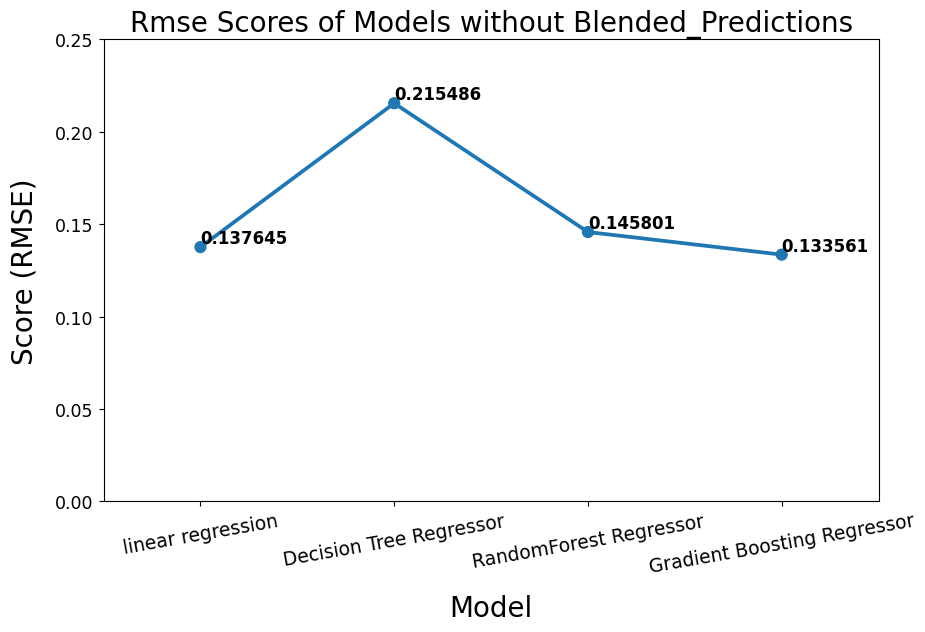

In [109]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.pointplot(x=list(rmse_scores.keys()), y=[score for score, _ in rmse_scores.values()], markers=['o'], linestyles=['-'], ax=ax)
for i, score in enumerate(rmse_scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

ax.set_ylabel('Score (RMSE)', size=20, labelpad=12.5)
ax.set_xlabel('Model', size=20, labelpad=12.5)
ax.tick_params(axis='x', labelsize=13.5, rotation=10)
ax.tick_params(axis='y', labelsize=12.5)
ax.set_ylim(0, 0.25)
ax.set_title('Rmse Scores of Models without Blended_Predictions', size=20)

plt.show()

## 오늘 꼭 기억해야 하는 알고리즘
- decision tree : 조건문 
- 사람을 분류 : 
    + 과적합의 문제를 갖고 있고, 오차 범위를 줄이기 위한 hyperparameter 를 조정한다.
    + lightbgm : 파라미터 수가 80개 이상.
    + 데이터가 많아지고 파라미터가 많아지면 인간의 분석능력이 도출하기 어려우므로
    컴퓨터에 hyperparameter tuning 들을 모두 넣고 학습을 돌린다.
    _ hyperparameter tuning이 중요하다

- 알고리즘을 공부하기 보다 최신 논문 동향을 공부하는 것이 낫다.

## 평가지표와 범주